# SD212: Graph mining
## Lab 1: Sampling nodes and edges

You will learn to:
* use the networkx package
* sample nodes / edges

## 1. The networkx package

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

### First graph

In [5]:
# Building the graph
graph = nx.Graph(name="My first graph")
graph.add_edge(1, 2)
graph.add_edge(2, 3)

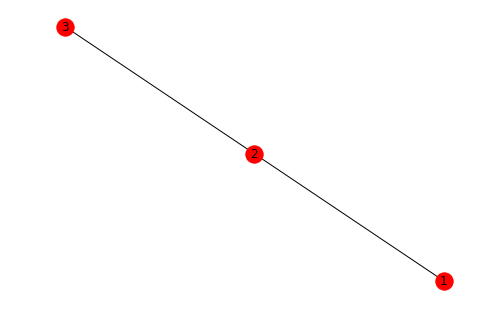

In [6]:
# Visualization
nx.draw(graph, with_labels=True)

In [7]:
# Summary
print(nx.info(graph))

Name: My first graph
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [8]:
# List of nodes 
nodes = list(graph.nodes())
print(nodes)

[1, 2, 3]


In [9]:
# Iterator on nodes
for u in graph.nodes():
    print (u)

1
2
3


In [10]:
# First node through the list / the iterator
nodes_iter = iter(graph.nodes())
print(nodes[0])
print(next(nodes_iter))

1
1


## To do

* Get the second node using the list and the iterator
* Get the first edge using the list of edges and the iterator on edges

In [11]:
# Get the second node using the list and the iterator
nodes_iter = iter(graph.nodes())
print(nodes[1])
next(nodes_iter)
print(next(nodes_iter))

# Get the first edge using the list of edges and the iterator on edges
edges = list(graph.edges())
edges_iter = iter(graph.edges())
print (edges[0])
print (next(edges_iter))

2
2
(1, 2)
(1, 2)


### Second graph

In [12]:
# Building the graph
social_graph = nx.Graph(name = "A social graph")
social_graph.add_edge('Albert','Barbara')
social_graph.add_edge('Albert','Carol')
social_graph.add_edge('Barbara','Dan')
social_graph.add_edge('Albert','Dan')

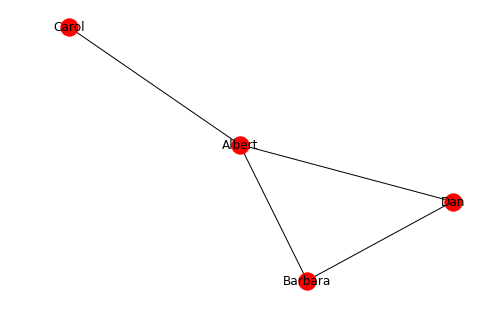

In [13]:
# Visualization
nx.draw(social_graph, with_labels = True)

In [14]:
# Summary
print (nx.info(social_graph))

Name: A social graph
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [15]:
# List of nodes / edges
print (social_graph.nodes())
print (social_graph.edges())

['Albert', 'Barbara', 'Carol', 'Dan']
[('Albert', 'Barbara'), ('Albert', 'Carol'), ('Albert', 'Dan'), ('Barbara', 'Dan')]


In [16]:
# Node degree
social_graph.degree('Albert')

3

In [17]:
# Neighbors
for u in social_graph.neighbors('Albert'):
    print(u)

Barbara
Carol
Dan


In [18]:
# List of node degrees
degrees = [social_graph.degree(u) for u in social_graph.nodes()]
degrees

[3, 2, 1, 2]

In [19]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print(u, social_graph[u])

Albert {'Barbara': {}, 'Carol': {}, 'Dan': {}}
Barbara {'Albert': {}, 'Dan': {}}
Carol {'Albert': {}}
Dan {'Barbara': {}, 'Albert': {}}


In [20]:
# Modifying the graph
edges = [('Barbara','Evelyn'),('Evelyn','Dan')]
social_graph.add_edges_from(edges)

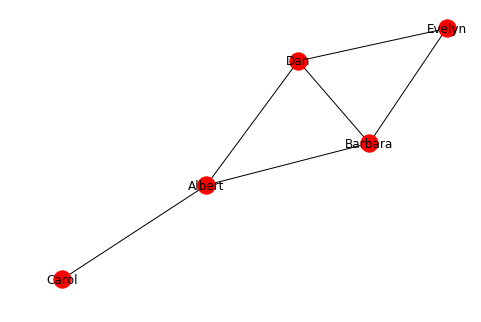

In [21]:
# Visualization
nx.draw(social_graph,with_labels = True)

### Layout

The layout allows you to visualize the graph (in 2D).

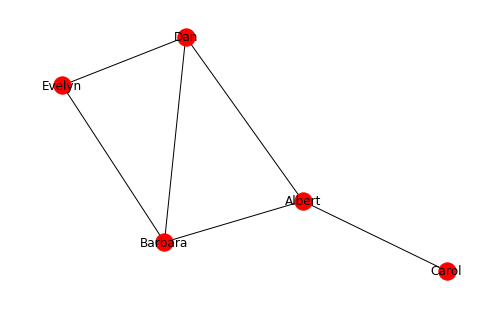

In [22]:
# Layout based on springs (default layout)
pos = nx.spring_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)

In [23]:
print (pos)

{'Albert': array([ 0.32909101, -0.07291686]), 'Barbara': array([-0.31726489, -0.16146278]), 'Carol': array([ 1.        , -0.22324384]), 'Dan': array([-0.21794101,  0.28112212]), 'Evelyn': array([-0.79388511,  0.17650137])}


Observe that two instances of the spring layout are generally not the same!

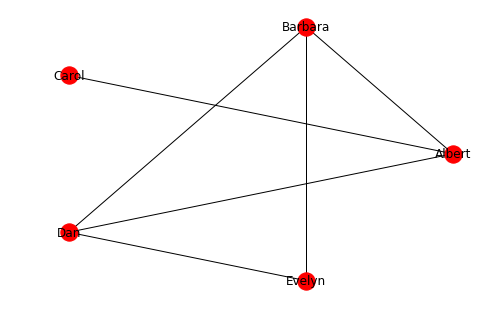

In [24]:
# Another layout
pos = nx.circular_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)

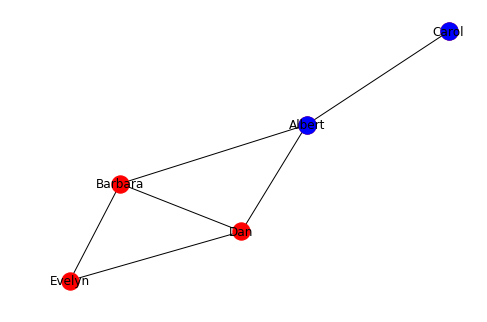

In [25]:
# Changing the color of some nodes
pos = nx.spring_layout(social_graph)
nx.draw(social_graph,pos,with_labels = True)
nodes = nx.draw_networkx_nodes(social_graph,pos,nodelist = ['Albert','Carol'],node_color='blue')

### Node labels

In most cases, the $n$ nodes are indexed from 0 to $n-1$. The name of each node (if any) is then stored as a label.

In [26]:
# Indexing nodes
names = list(social_graph.nodes())
social_graph = nx.convert_node_labels_to_integers(social_graph)

In [27]:
# Adding names as labels
for i in social_graph.nodes():
    social_graph.node[i]['name'] = names[i]

In [28]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert'}
1 {'name': 'Barbara'}
2 {'name': 'Carol'}
3 {'name': 'Dan'}
4 {'name': 'Evelyn'}


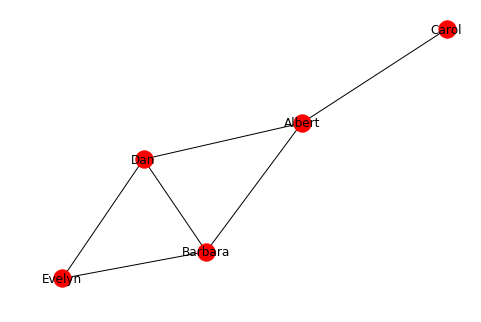

In [29]:
names = nx.get_node_attributes(social_graph,'name')
nx.draw(social_graph, labels = names)

In [30]:
# Adding other labels
women = ['Barbara', 'Carol','Evelyn']

for u in social_graph.nodes():
    if social_graph.node[u]['name'] in women:
        social_graph.node[u]['gender'] = 'Female'
    else:
        social_graph.node[u]['gender'] = 'Male'

In [31]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert', 'gender': 'Male'}
1 {'name': 'Barbara', 'gender': 'Female'}
2 {'name': 'Carol', 'gender': 'Female'}
3 {'name': 'Dan', 'gender': 'Male'}
4 {'name': 'Evelyn', 'gender': 'Female'}


In [32]:
# Store the positions as labels
pos = nx.spring_layout(social_graph)
for u in social_graph.nodes():
    social_graph.node[u]['pos'] = tuple(pos[u])

In [33]:
for u in social_graph.nodes():
    print (u, social_graph.node[u])

0 {'name': 'Albert', 'gender': 'Male', 'pos': (0.1377277824426537, -0.32912937579114493)}
1 {'name': 'Barbara', 'gender': 'Female', 'pos': (-0.33463844820843763, 0.17442245820226668)}
2 {'name': 'Carol', 'gender': 'Female', 'pos': (0.41846088899380574, -1.0)}
3 {'name': 'Dan', 'gender': 'Male', 'pos': (0.11068084972570291, 0.36077117981453544)}
4 {'name': 'Evelyn', 'gender': 'Female', 'pos': (-0.33223107295372445, 0.793935737774343)}


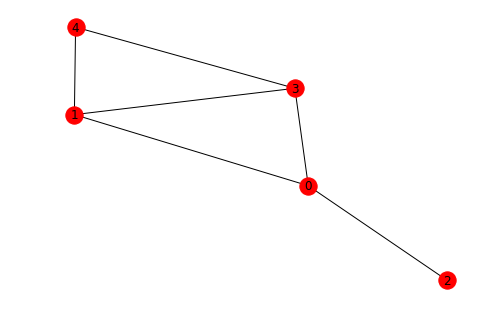

In [34]:
pos = nx.get_node_attributes(social_graph,'pos')
nx.draw(social_graph,pos,with_labels = True)

### Edge labels

In [35]:
# Adding weights
for u,v in social_graph.edges():
    social_graph[u][v]['weight'] = np.random.randint(1,10)

In [36]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

0 {1: {'weight': 7}, 2: {'weight': 5}, 3: {'weight': 6}}
1 {0: {'weight': 7}, 3: {'weight': 8}, 4: {'weight': 7}}
2 {0: {'weight': 5}}
3 {0: {'weight': 6}, 1: {'weight': 8}, 4: {'weight': 5}}
4 {1: {'weight': 7}, 3: {'weight': 5}}


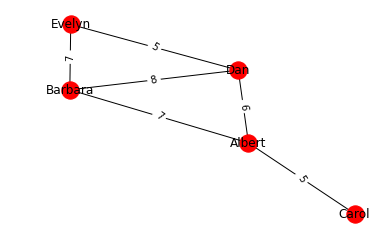

In [37]:
# Visualization with edge weights
weights = nx.get_edge_attributes(social_graph, 'weight')
nx.draw_networkx_edge_labels(social_graph, pos, edge_labels = weights)
nx.draw(social_graph, pos, labels = names)

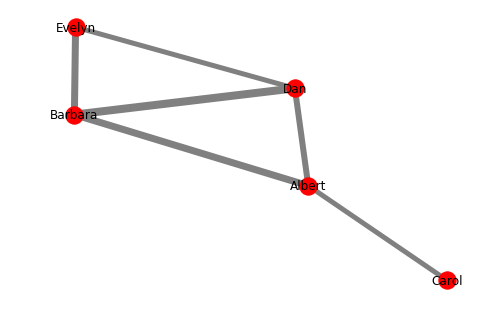

In [38]:
# Visualization with edge widths = edge weights
weights_list = [weights[e] for e in social_graph.edges()]
nx.draw(social_graph, pos, labels = names, width = weights_list, edge_color = 'grey')

In [39]:
# Adding edge labels
categories = ['Family', 'Work', 'Friend']
for u,v in social_graph.edges():
    social_graph[u][v]['category'] = str(np.random.choice(categories))

In [40]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print (u, social_graph[u])

0 {1: {'weight': 7, 'category': 'Work'}, 2: {'weight': 5, 'category': 'Friend'}, 3: {'weight': 6, 'category': 'Family'}}
1 {0: {'weight': 7, 'category': 'Work'}, 3: {'weight': 8, 'category': 'Friend'}, 4: {'weight': 7, 'category': 'Work'}}
2 {0: {'weight': 5, 'category': 'Friend'}}
3 {0: {'weight': 6, 'category': 'Family'}, 1: {'weight': 8, 'category': 'Friend'}, 4: {'weight': 5, 'category': 'Family'}}
4 {1: {'weight': 7, 'category': 'Work'}, 3: {'weight': 5, 'category': 'Family'}}


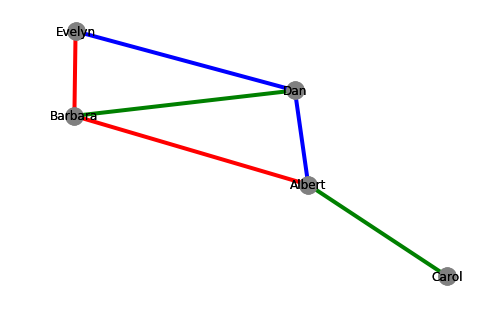

In [41]:
# Visualization with categories
nx.draw(social_graph, pos, labels = names, node_color = 'grey')

color_map = {'Family': 'b', 'Work': 'r', 'Friend': 'g'}

categories = nx.get_edge_attributes(social_graph, 'category')
edgelists = {}
for u, category in categories.items():
    edgelists.setdefault(category, []).append(u)

nx.draw(social_graph, pos, labels = names, node_color = 'gray')
for category in edgelists:
    edges = nx.draw_networkx_edges(social_graph, pos, edgelist = edgelists[category], width = 4, edge_color = color_map[category])
plt.show()

### Directed graphs

In [42]:
# Building the graph
edges = [(1,3),(3,2),(1,3),(1,4),(3,5),(2,4),(2,5),(4,3),(5,4),(5,6),(6,1)]
digraph = nx.from_edgelist(edges, create_using=nx.DiGraph())
digraph.graph['name'] = "A directed graph"

In [43]:
# Summary (observe the type of graph)
print(nx.info(digraph))

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


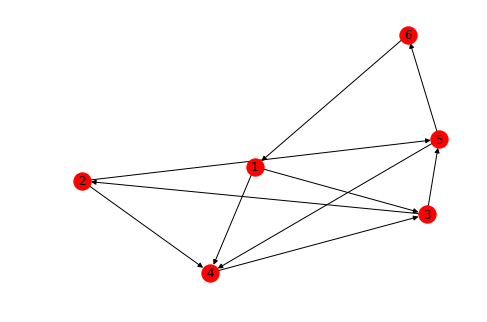

In [44]:
# Visualization
nx.draw(digraph,with_labels = True)

### Writing and reading graphs

The `networkx` package allows you to write and read graphs in many formats. We will use the `graphml` format.

Complex data structures like `tuples` of `lists` are not supported. 

## To do

* Replace the label `pos` by two labels, one per coordinate.
* Save the graph in graphml format.
* Read the graph (use the type `int` for node indices) and check the labels.

In [45]:
for k, v in pos.items():
    social_graph.nodes[k].pop('pos')
    social_graph.nodes[k]['pos_x'] = float(v[0])
    social_graph.nodes[k]['pos_y'] = float(v[1])

nx.write_graphml(social_graph, "social_graph.graphml")
graph = nx.read_graphml("social_graph.graphml", node_type = int)

## 2. Datasets

You will now work on two real datasets, OpenStreet and Openflights, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab1.zip).

### OpenStreet

OpenStreet is a graph of streets in the center of Paris. Nodes correspond to intersections. The graph is directed due to one-way streets. Weights correspond to distances between intersections  (in meters). Source: [Open Street Map](http://openstreetmap.fr)

In [46]:
# First download the datasets!
openstreet = nx.read_graphml("openstreet.graphml", node_type = int)

In [47]:
print (nx.info(openstreet))

Name: openstreet
Type: DiGraph
Number of nodes: 6025
Number of edges: 8170
Average in degree:   1.3560
Average out degree:   1.3560


In [48]:
# Get positions
pos_x = nx.get_node_attributes(openstreet,'pos_x')
pos_y = nx.get_node_attributes(openstreet,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openstreet.nodes()}

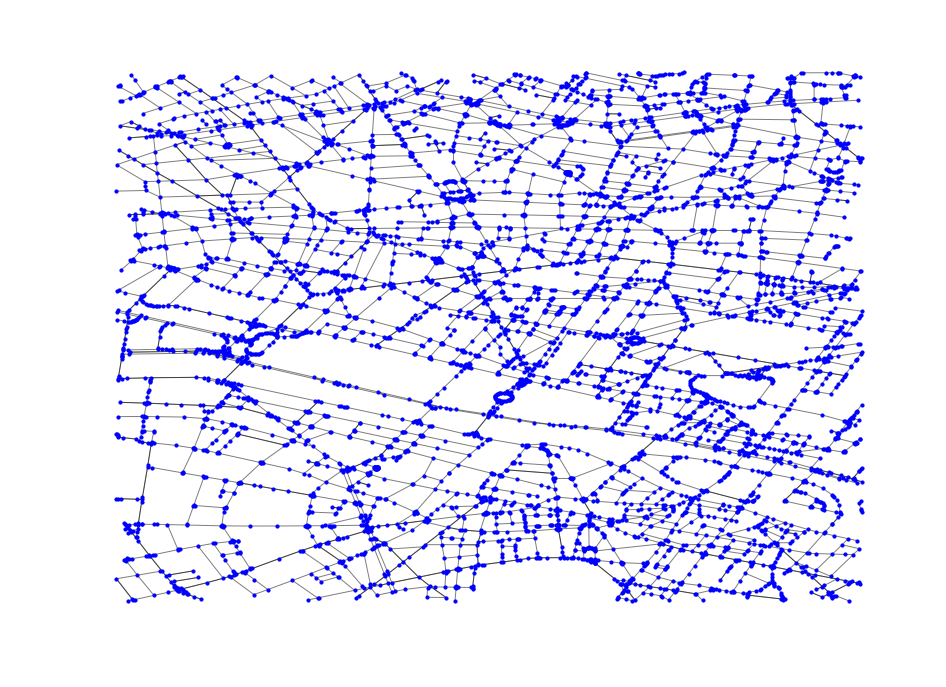

In [49]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

In [50]:
# A shortest path 
path = nx.shortest_path(openstreet, 0, 1000, weight = 'weight')

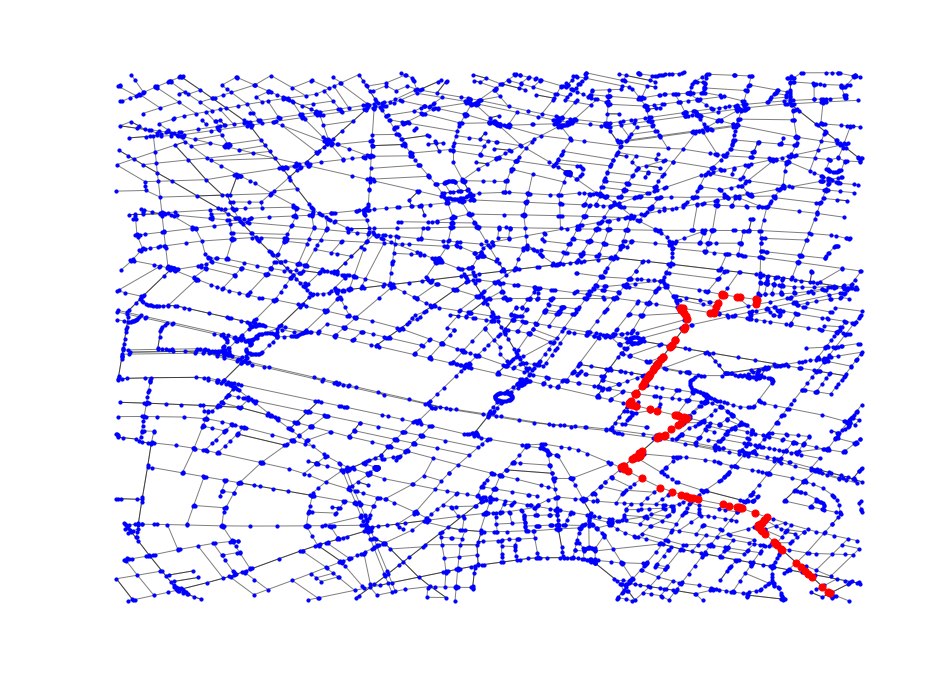

In [51]:
# Visualization
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openstreet, pos, nodelist = path, node_size = 50, node_color = 'r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows = False, alpha = 0.5)
plt.show()

## To do

* Show the shortest path from Pantheon to Gare Saint Lazare.

In [52]:
pantheon_pos = [2.346418, 48.846275]
gare_saint_lazare_pos = [2.325407, 48.876314]

In [53]:
def find_node_from_pos(pos):
    min_distance = 1e9
    min_index = -1
    n = len(openstreet.nodes)
    
    for i in openstreet.nodes:
        distance = (openstreet.nodes[i]['pos_x'] - pos[0]) ** 2 \
                   + (openstreet.nodes[i]['pos_y'] - pos[1]) ** 2
        if distance < min_distance:
            min_distance = distance
            min_index = i
            
    return min_index

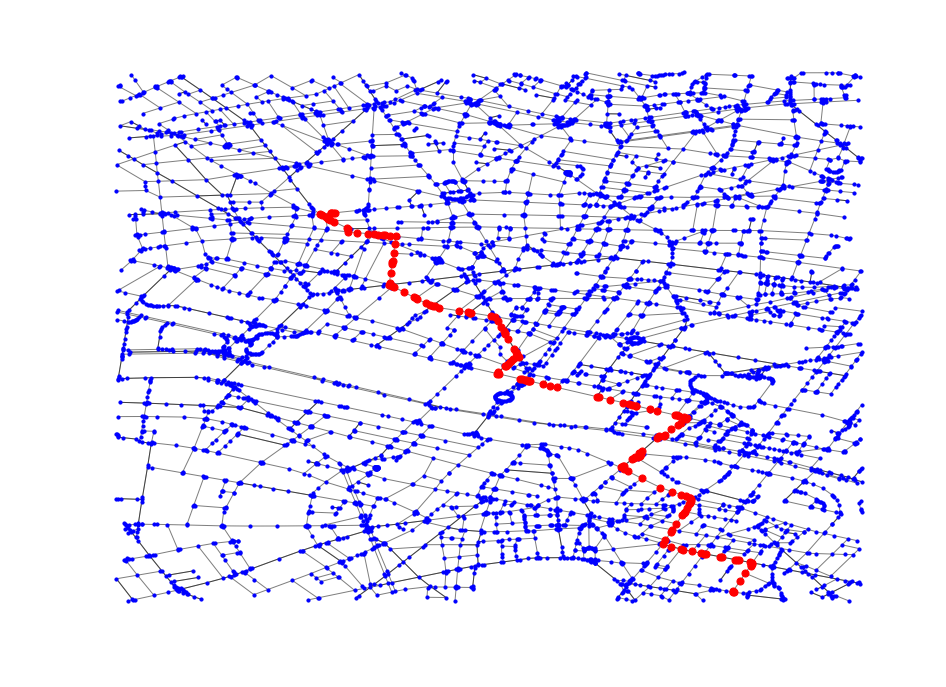

In [54]:
path = nx.shortest_path(
    openstreet,
    find_node_from_pos(pantheon_pos),
    find_node_from_pos(gare_saint_lazare_pos),
    weight='weight')
# Visualization
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size=10, node_color='b')
nx.draw_networkx_nodes(
    openstreet, pos, nodelist=path, node_size=50, node_color='r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows=False, alpha=0.5)
plt.show()

## OpenFlights

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [55]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [56]:
print(nx.info(openflights))

Name: openflight
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [57]:
# Get node from (partial) name

def get_node_from_name(name):
    list_nodes = []
    for u in openflights.nodes():
        if openflights.node[u]['name'].find(name) >= 0:
            list_nodes.append(u)
    return list_nodes

for u in get_node_from_name('Charles de Gaulle'):
    print (u,openflights.node[u]['name'])

622 Charles de Gaulle International Airport


In [58]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

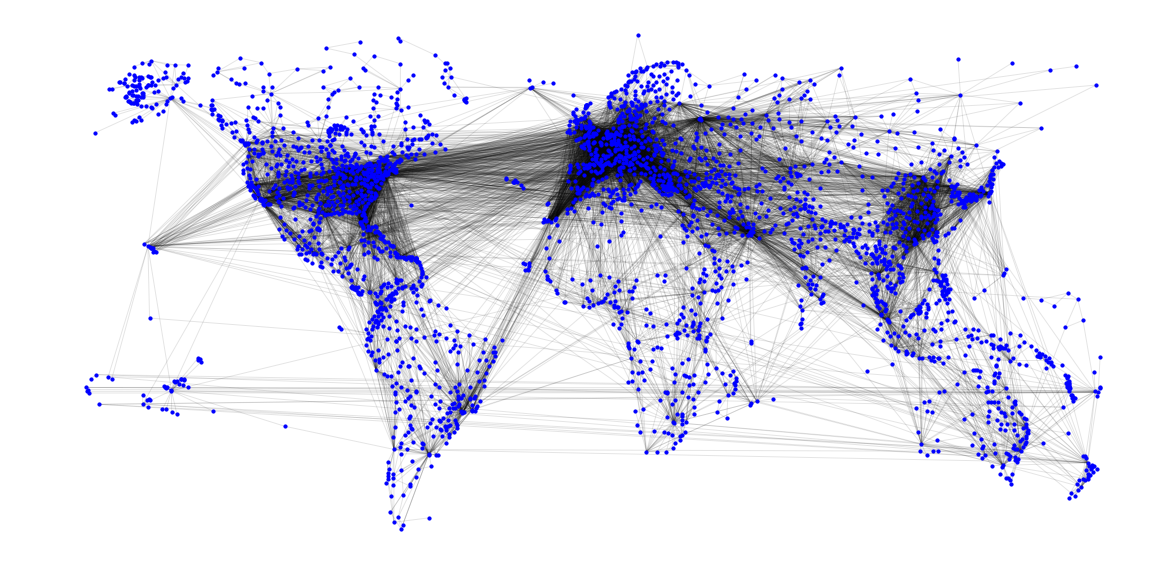

In [59]:
# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
plt.show()

## To do

* List the top-10 airports in number of flights and show them on the map.
* Which proportion of traffic is generated by the top-100 airports?

['Dallas Fort Worth International Airport', 'Domodedovo International Airport', 'Munich International Airport', 'Beijing Capital International Airport', "Chicago O'Hare International Airport", 'Hartsfield Jackson Atlanta International Airport', 'Atatürk International Airport', 'Amsterdam Airport Schiphol', 'Charles de Gaulle International Airport', 'Frankfurt am Main International Airport']


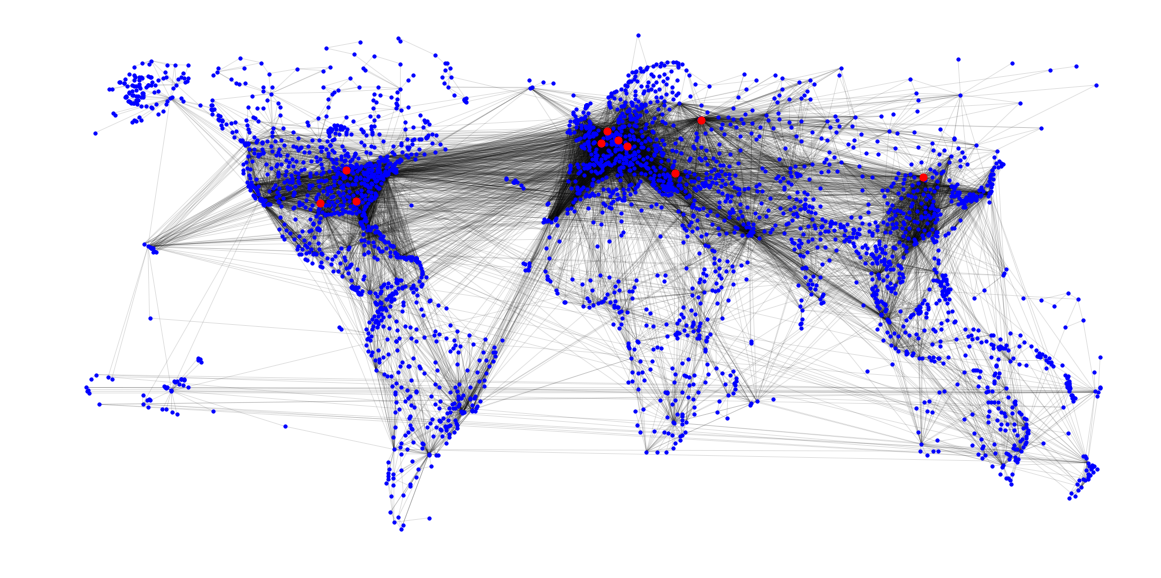

In [60]:
length_list = [len(openflights[u]) for u in openflights.nodes()]
args_top10 = np.argsort(length_list)[-10:]
names_top10 = [openflights.nodes[u]['name'] for u in args_top10]
print (names_top10)
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
nx.draw_networkx_nodes(openflights, pos, nodelist=list(args_top10), node_size = 50, node_color = 'r')
plt.show()

In [61]:
print (np.sum(np.sort(length_list)[-100:]) / np.sum(length_list))

0.3361732534491288


# 3. Node and edge sampling

In the rest of the lab, we work on the OpenFlights dataset.

## To do

List:
* 10 random nodes 
* 10 random neighbors
* 10 random ends of random edges

In each case, show both the name of the airport and the degree of the corresponding node.

In [62]:
# Shuffling nodes
np.random.seed(42)
nodes = list(openflights.nodes())
np.random.shuffle(nodes)
nodes_sampled = nodes[:10]
names = [openflights.nodes[node]['name'] for node in nodes_sampled]
degrees = [openflights.degree(node) for node in nodes_sampled]
for i in range(10):
    print (names[i] + " " + str(degrees[i]))

Ataq Airport 1
Barquisimeto International Airport 3
Kununurra Airport 3
Gan International Airport 3
Puerto Lempira Airport 2
Tagbilaran Airport 1
Ulanhot Airport 4
Brussels South Charleroi Airport 83
Fabio Alberto Leon Bentley Airport 2
Munich International Airport 189


In [63]:
np.random.seed(42)
nodes = list(openflights.nodes())
np.random.shuffle(nodes)
nodes_sampled = [np.random.choice(list(openflights[node].keys())) for node in nodes[:100]]
names = [openflights.nodes[node]['name'] for node in nodes_sampled]
degrees = [openflights.degree(node) for node in nodes_sampled]
for i in range(100):
    print (names[i] + " " + str(degrees[i]))
    
print (np.mean(degrees), np.std(degrees))

Sana'a International Airport 23
Hato International Airport 19
Darwin International Airport 20
Kaadedhdhoo Airport 2
Toncontín International Airport 11
Ninoy Aquino International Airport 77
Beijing Nanyuan Airport 36
Carcassonne Airport 10
El Dorado International Airport 74
Ljubljana Jože Pučnik Airport 22
Trenton Mercer Airport 14
Metropolitan Oakland International Airport 34
Donetsk International Airport 12
Málaga Airport 116
Calgary International Airport 60
Chek Lap Kok International Airport 130
General Edward Lawrence Logan International Airport 102
Golmud Airport 2
Nashville International Airport 46
Belgrade Nikola Tesla Airport 51
Jorge Chávez International Airport 56
Detroit Metropolitan Wayne County Airport 135
Peawanuck Airport 1
Addis Ababa Bole International Airport 67
Kaltag Airport 3
Berlin-Schönefeld International Airport 68
Saratov Central Airport 5
Da Nang International Airport 20
Dublin Airport 144
Venice Marco Polo Airport 72
Addis Ababa Bole International Airport 67
T

In [64]:
# Shuffling edges
np.random.seed(42)
edges = list(openflights.edges())
np.random.shuffle(edges)
edges_sampled = edges[:100]
nodes_sampled = [np.random.choice(edge) for edge in edges_sampled]
names = [openflights.nodes[node]['name'] for node in nodes_sampled]
degrees = [openflights.degree(node) for node in nodes_sampled]
for i in range(100):
    print (names[i] + " " + str(degrees[i]))
    
print (np.mean(degrees), np.std(degrees))

Aktobe Airport 4
Minneapolis-St Paul International/Wold-Chamberlain Airport 129
Chek Lap Kok International Airport 130
Singapore Changi Airport 123
Soekarno-Hatta International Airport 62
Almirante Marco Andres Zar Airport 5
Indira Gandhi International Airport 94
Gazipaşa Airport 6
Houari Boumediene Airport 61
Jining Qufu Airport 9
Antonio B. Won Pat International Airport 19
Nuiqsut Airport 2
Western Neb. Rgnl/William B. Heilig Airport 1
Pichoy Airport 2
Chengdu Shuangliu International Airport 101
Guarulhos - Governador André Franco Montoro International Airport 90
Muscat International Airport 52
Montreal / Pierre Elliott Trudeau International Airport 92
Djerba Zarzis International Airport 22
Mandalay International Airport 8
Dubrovnik Airport 41
Moses Kilangin Airport 3
Paris-Orly Airport 119
Nantes Atlantique Airport 55
Governador José Richa Airport 7
Chicago O'Hare International Airport 204
Jeju International Airport 33
Deputado Luiz Eduardo Magalhães International Airport 28
Newcast

## To do 

* Compute the mean and standard deviation of the degrees.
* Display the degree distribution. Can it be considered as a power law?
* Compute the mean and standard deviation of the degree of a random neighbor.
* Compute the mean and standard deviation of the degree of a node sampled from the edges. 
* Interpret the results.
* (optional) Do the same with nodes / edges sampled in proportion to their weights and interpret the results.

In [65]:
degrees = list(dict(openflights.degree()).values())
mean = np.mean(degrees)
std = np.std(degrees)
print (mean, std)

11.748789150791088 24.84163959533936


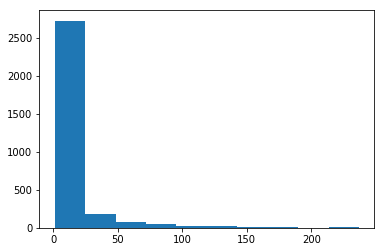

In [66]:
plt.hist(degrees)
plt.show()